In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [ ]:
df = pd.read_csv(r"/kaggle/input/ford-car-price-prediction/ford.csv")

In [126]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,NaN,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,NaN,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,NaN,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,NaN,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,NaN,1482,Petrol,145,48.7,1.0


In [127]:
df.shape

(17966, 9)

In [128]:
df.isnull().sum()

model               0
year                0
price               0
transmission    17966
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  0 non-null      float64
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.2+ MB


In [130]:
df.describe()

,year,price,transmission,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,0.0,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,NaN,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,NaN,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,NaN,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,NaN,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,NaN,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,NaN,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,NaN,177644.000000,580.000000,201.800000,5.000000


<Axes: xlabel='price', ylabel='Count'>

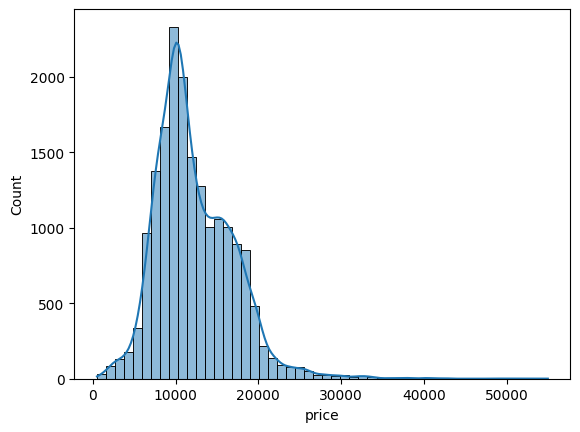

In [131]:
sns.histplot(df['price'] , kde = True , bins = 50 )

In [132]:
df.corr(numeric_only = True)

,year,price,transmission,mileage,tax,mpg,engineSize
year,1.000000,0.636009,NaN,-0.707818,0.298506,-0.022967,-0.137311
price,0.636009,1.000000,NaN,-0.530659,0.406857,-0.346419,0.411178
transmission,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,-0.707818,-0.530659,NaN,1.000000,-0.260451,0.120075,0.215035
tax,0.298506,0.406857,NaN,-0.260451,1.000000,-0.502980,0.184363
mpg,-0.022967,-0.346419,NaN,0.120075,-0.502980,1.000000,-0.260521
engineSize,-0.137311,0.411178,NaN,0.215035,0.184363,-0.260521,1.000000


<Axes: >

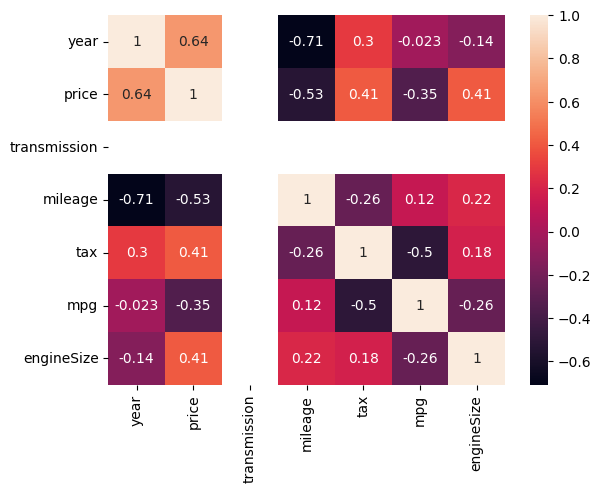

In [133]:
sns.heatmap(df.corr(numeric_only = True) , annot  = True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

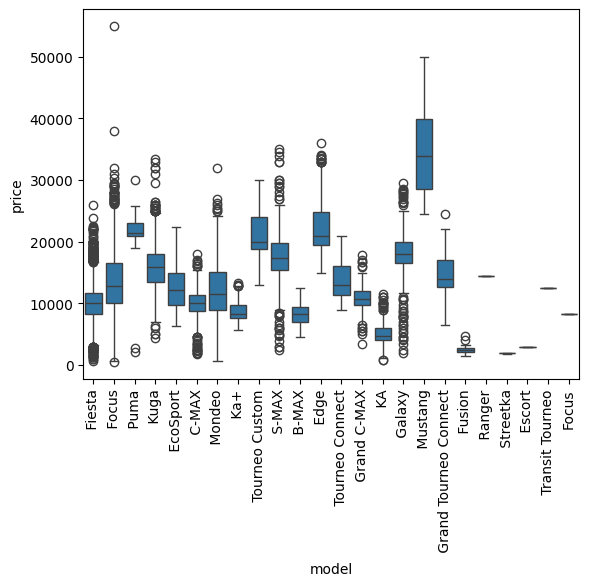

In [134]:
sns.boxplot(data = df , x = df['model'] , y = df['price'])
plt.xticks(rotation = 90)

<Axes: xlabel='price', ylabel='mileage'>

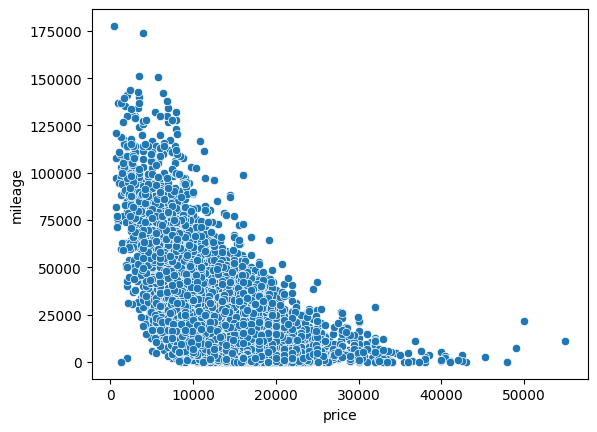

In [135]:
sns.scatterplot(data = df , x = 'price' , y = 'mileage')

<Axes: xlabel='engineSize', ylabel='price'>

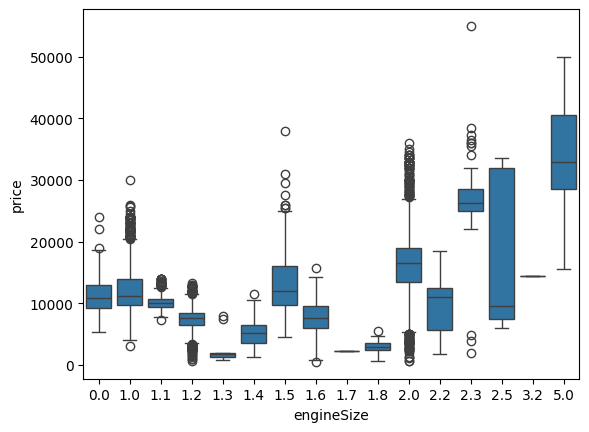

In [136]:
sns.boxplot(data = df , x = df['engineSize'] , y = df['price'])

<Axes: xlabel='fuelType', ylabel='price'>

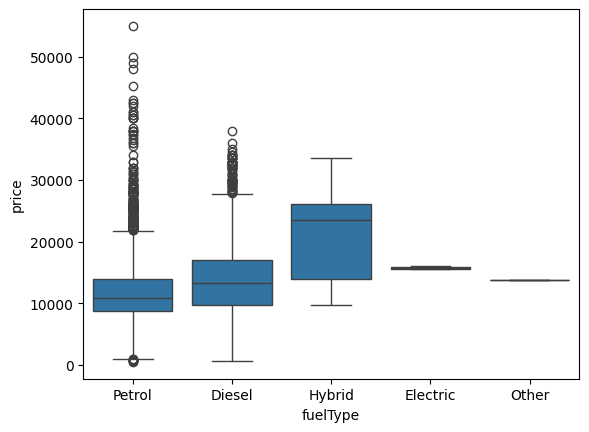

In [137]:
sns.boxplot(data = df , x = df['fuelType'] ,  y = df['price'])

In [138]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<Axes: xlabel='tax', ylabel='price'>

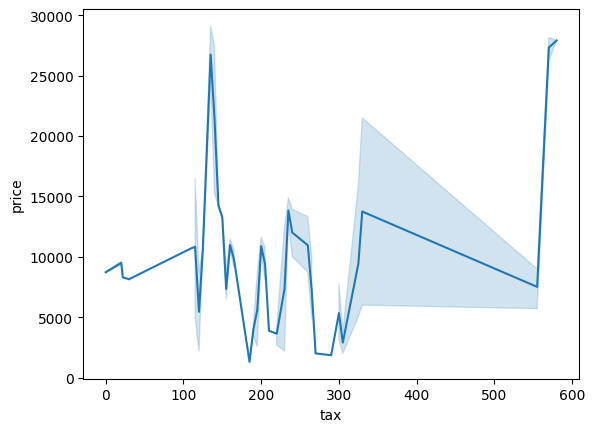

In [139]:
sns.lineplot(data = df , x = df['tax'] , y = df['price'])

**Now Creating an Model **

In [140]:
X = df.drop(columns = ['price'] , axis = 1)
y = df['price'] # this have to predict 

In [141]:
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,NaN,15944,Petrol,150,57.7,1.0
1,Focus,2018,NaN,9083,Petrol,150,57.7,1.0
2,Focus,2017,NaN,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,NaN,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,NaN,1482,Petrol,145,48.7,1.0


In [142]:
y.head()

0    12000
1    14000
2    13000
3    17500
4    16500
Name: price, dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  0 non-null      float64
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.2+ MB


In [144]:
df_one_hot_encoding  = pd.get_dummies(X , columns = ['transmission' , 'fuelType' , 'model'] , drop_first = True )
df_one_hot_encoding

,year,mileage,tax,mpg,engineSize,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_ C-MAX,...,model_ Mondeo,model_ Mustang,model_ Puma,model_ Ranger,model_ S-MAX,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus
0,2017,15944,150,57.7,1.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2018,9083,150,57.7,1.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2017,12456,150,57.7,1.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2019,10460,145,40.3,1.5,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2019,1482,145,48.7,1.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
17962,2014,40700,30,57.7,1.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
17963,2015,7010,20,67.3,1.6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17964,2018,5007,145,57.7,1.2,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [145]:
df_one_hot_encoding.astype(int)

,year,mileage,tax,mpg,engineSize,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_ C-MAX,...,model_ Mondeo,model_ Mustang,model_ Puma,model_ Ranger,model_ S-MAX,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus
0,2017,15944,150,57,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,9083,150,57,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,12456,150,57,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,10460,145,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,1482,145,48,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17962,2014,40700,30,57,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
df_one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          17966 non-null  int64  
 1   mileage                       17966 non-null  int64  
 2   tax                           17966 non-null  int64  
 3   mpg                           17966 non-null  float64
 4   engineSize                    17966 non-null  float64
 5   fuelType_Electric             17966 non-null  bool   
 6   fuelType_Hybrid               17966 non-null  bool   
 7   fuelType_Other                17966 non-null  bool   
 8   fuelType_Petrol               17966 non-null  bool   
 9   model_ C-MAX                  17966 non-null  bool   
 10  model_ EcoSport               17966 non-null  bool   
 11  model_ Edge                   17966 non-null  bool   
 12  model_ Escort                 17966 non-null  bool   
 13  m

In [147]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [148]:
bool_cols = df_one_hot_encoding.select_dtypes(include='bool').columns
df_one_hot_encoding[bool_cols] = df_one_hot_encoding[bool_cols].astype(int)


In [149]:
df_one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          17966 non-null  int64  
 1   mileage                       17966 non-null  int64  
 2   tax                           17966 non-null  int64  
 3   mpg                           17966 non-null  float64
 4   engineSize                    17966 non-null  float64
 5   fuelType_Electric             17966 non-null  int64  
 6   fuelType_Hybrid               17966 non-null  int64  
 7   fuelType_Other                17966 non-null  int64  
 8   fuelType_Petrol               17966 non-null  int64  
 9   model_ C-MAX                  17966 non-null  int64  
 10  model_ EcoSport               17966 non-null  int64  
 11  model_ Edge                   17966 non-null  int64  
 12  model_ Escort                 17966 non-null  int64  
 13  m

In [150]:
df_one_hot_encoding

,year,mileage,tax,mpg,engineSize,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_ C-MAX,...,model_ Mondeo,model_ Mustang,model_ Puma,model_ Ranger,model_ S-MAX,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus
0,2017,15944,150,57.7,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,9083,150,57.7,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,12456,150,57.7,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,10460,145,40.3,1.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,1482,145,48.7,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17962,2014,40700,30,57.7,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17963,2015,7010,20,67.3,1.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17964,2018,5007,145,57.7,1.2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [152]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [153]:
numerical_columns = ['year' , 'mileage', 'tax','mpg','engineSize']
df_one_hot_encoding[numerical_columns] = scaler.fit_transform(df_one_hot_encoding[numerical_columns])

In [154]:
df_one_hot_encoding[numerical_columns]

,year,mileage,tax,mpg,engineSize
0,0.065128,-0.380998,0.591358,-0.020442,-0.811386
1,0.552866,-0.733359,0.591358,-0.020442,-0.811386
2,0.065128,-0.560132,0.591358,-0.020442,-0.811386
3,1.040605,-0.662640,0.510727,-1.738890,0.345070
4,1.040605,-1.123724,0.510727,-0.909294,-0.811386
...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.067312,0.113779
17962,-1.398088,0.890398,-1.343791,-0.020442,-0.811386
17963,-0.910349,-0.839822,-1.505053,0.927668,0.576362
17964,0.552866,-0.942690,0.510727,-0.020442,-0.348804


In [155]:
df_one_hot_encoding

,year,mileage,tax,mpg,engineSize,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_ C-MAX,...,model_ Mondeo,model_ Mustang,model_ Puma,model_ Ranger,model_ S-MAX,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus
0,0.065128,-0.380998,0.591358,-0.020442,-0.811386,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.552866,-0.733359,0.591358,-0.020442,-0.811386,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.065128,-0.560132,0.591358,-0.020442,-0.811386,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.040605,-0.662640,0.510727,-1.738890,0.345070,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.040605,-1.123724,0.510727,-0.909294,-0.811386,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.067312,0.113779,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17962,-1.398088,0.890398,-1.343791,-0.020442,-0.811386,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17963,-0.910349,-0.839822,-1.505053,0.927668,0.576362,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17964,0.552866,-0.942690,0.510727,-0.020442,-0.348804,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [167]:
X_train, X_test, y_train, y_test = train_test_split(df_one_hot_encoding, y, test_size=0.33, random_state=42) 

In [172]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [175]:
y_pred = model.predict(X_test)
y_pred

array([ 6665.72952492,  9165.66696004,  9924.56243261, ...,
       19674.11920697,  5355.36431196, 10211.74479701])

In [176]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [178]:
r2 = r2_score(y_test , y_pred)
r2

0.8393572786503963

In [180]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R² Score:", adjusted_r2)


Adjusted R² Score: 0.8384854049931394
